# Hoàng Đạo Thông
# 2174802010149

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng Bilateral filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Canny Edge Detection để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi kênh màu theo thứ tự (ví dụ: BGR → BRG) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu YCrCb và tách riêng 3 kênh Y, Cr, Cb, lưu thành ảnh grayscale tương ứng (`[ten_anh]_Y.jpg`, `[ten_anh]_Cr.jpg`, `[ten_anh]_Cb.jpg`). (0.5 điểm)


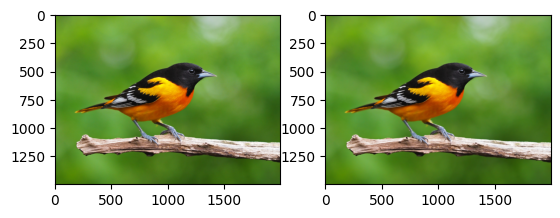

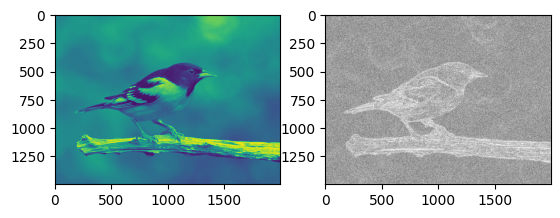

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as sn
import imageio.v2 as iio
from skimage import feature
import os
import cv2

image_name = 'bird.png'
img = iio.imread(image_name).astype(np.uint8)
base_name = os.path.splitext(image_name)[0]

# --- 1. Bilateral Filter
bilateral = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(bilateral)
plt.show()

# --- 2. Canny Edge Detection
a = iio.imread('bird.png', mode = 'F')
b = feature.canny(a).astype(np.uint8)
plt.subplot(1,2,1)
plt.imshow(a)
plt.subplot(1,2,2)
plt.imshow(255-b, cmap='gray')
plt.show()

# --- 3. Hoán đổi kênh màu: BGR -> BRG
swapped = img[:, :, [0, 2, 1]]
iio.imwrite(f'{base_name}_swapped.png', swapped)

# --- 4. Chuyển sang YCrCb và tách kênh
def rgb2ycrcb(rgb):
    r = rgb[:, :, 0].astype(float)
    g = rgb[:, :, 1].astype(float)
    b = rgb[:, :, 2].astype(float)
    Y  = 0.299*r + 0.587*g + 0.114*b
    Cr = (r - Y) * 0.713 + 128
    Cb = (b - Y) * 0.564 + 128
    return Y, Cr, Cb

Y, Cr, Cb = rgb2ycrcb(img)
iio.imwrite(f'{base_name}_Y.png', Y.astype(np.uint8))
iio.imwrite(f'{base_name}_Cr.png', Cr.astype(np.uint8))
iio.imwrite(f'{base_name}_Cb.png', Cb.astype(np.uint8))

### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật biến đổi hình học và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Phóng to ảnh (Zoom bằng resize) (0.5 điểm)  
* Xoay ảnh (góc ngẫu nhiên từ 0–360 độ) (0.5 điểm)  
* Lật ảnh ngang (0.5 điểm)  
* Lật ảnh dọc (0.5 điểm)  
* Cắt ảnh (crop ngẫu nhiên vùng giữa ảnh) (0.5 điểm)  
* Thêm viền (padding màu ngẫu nhiên) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* Z: Zoom  
* T: Rotate  
* H: Horizontal Flip  
* V: Vertical Flip  
* C: Crop  
* P: Padding (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_crop_cat.jpg`, `result_rotate_image1.jpg` (0.5 điểm)



Ảnh đang xử lý: img_1.jpg
Chọn kỹ thuật xử lý:
Z: Zoom | T: Rotate | H: Flip H | V: Flip V | C: Crop | P: Padding


✅ Ảnh đã lưu: result_zoom_img_1.jpg


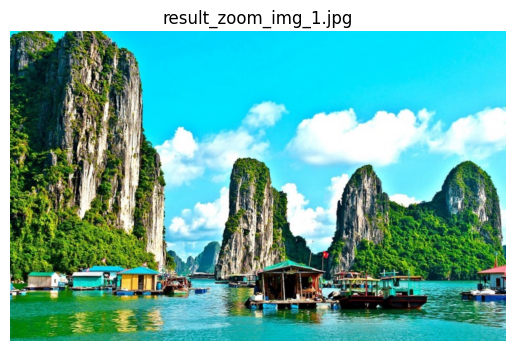


Ảnh đang xử lý: img_2.jpg
Chọn kỹ thuật xử lý:
Z: Zoom | T: Rotate | H: Flip H | V: Flip V | C: Crop | P: Padding
✅ Ảnh đã lưu: result_crop_img_2.jpg


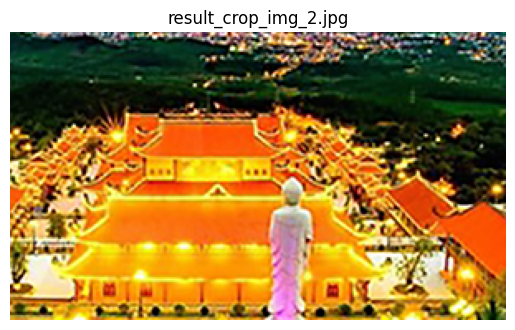


Ảnh đang xử lý: img_3.jpg
Chọn kỹ thuật xử lý:
Z: Zoom | T: Rotate | H: Flip H | V: Flip V | C: Crop | P: Padding
✅ Ảnh đã lưu: result_pad_img_3.jpg


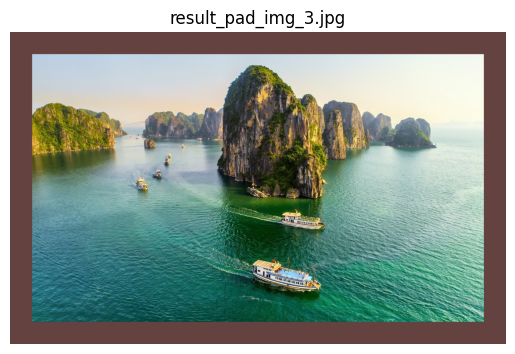

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

image_names = ['img_1.jpg', 'img_2.jpg', 'img_3.jpg']

for image_name in image_names:
    img = cv2.imread(image_name)
    if img is None:
        print(f"Không tìm thấy ảnh {image_name}")
        continue

    base_name = os.path.splitext(image_name)[0]

    print("\nẢnh đang xử lý:", image_name)
    print("Chọn kỹ thuật xử lý:")
    print("Z: Zoom | T: Rotate | H: Flip H | V: Flip V | C: Crop | P: Padding")

    key = input("Nhập phím tương ứng: ").strip().upper()

    result = img.copy()
    fname = ""

    if key == 'Z':
        result = cv2.resize(img, None, fx=3.0, fy=3.0)
        fname = f"result_zoom_{base_name}.jpg"

    elif key == 'T':
        angle = random.randint(0, 360)
        (h, w) = img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        result = cv2.warpAffine(img, M, (w, h))
        fname = f"result_rotate_{base_name}.jpg"

    elif key == 'H':
        result = cv2.flip(img, 1)
        fname = f"result_flipH_{base_name}.jpg"

    elif key == 'V':
        result = cv2.flip(img, 0)
        fname = f"result_flipV_{base_name}.jpg"

    elif key == 'C':
        h, w = img.shape[:2]
        result = img[h//4:3*h//4, w//4:3*w//4]
        fname = f"result_crop_{base_name}.jpg"

    elif key == 'P':
        color = [random.randint(0, 255) for _ in range(3)]
        result = cv2.copyMakeBorder(img, 50, 50, 50, 50,
                                    cv2.BORDER_CONSTANT, value=color)
        fname = f"result_pad_{base_name}.jpg"

    else:
        print("Phím không hợp lệ.")
        continue

    # Lưu ảnh và hiển thị
    cv2.imwrite(fname, result)
    print(f"Ảnh đã lưu: {fname}")
    
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(fname)
    plt.axis('off')
    plt.show()


### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Thêm viền đen 20 pixel cho ảnh đầu tiên. (0.5 điểm)  
* Xoay ảnh thứ hai 45 độ và phóng to 1.5 lần. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 4 lần, sau đó áp dụng Bilateral Filter với tham số tùy chọn. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba theo công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.6, 2.0], \quad \beta \in [-60, 60]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


In [12]:
import cv2
import numpy as np

# Tên ảnh cần xử lý
image1 = 'img_1.jpg'
image2 = 'img_2.jpg'
image3 = 'img_3.jpg'

# --- 1. Thêm viền đen
img1 = cv2.imread(image1)

bordered = cv2.copyMakeBorder(img1, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=(0, 0, 0))
cv2.imwrite("result_border_" + image1, bordered)

# --- 2. Xoay 45 độ và zoom 1.5x
img2 = cv2.imread(image2)

(h2, w2) = img2.shape[:2]
center = (w2 // 2, h2 // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.5)  # Góc 45, scale 1.5
rotated_zoomed = cv2.warpAffine(img2, M, (w2, h2))
cv2.imwrite("result_rotate_zoom_" + image2, rotated_zoomed)

# --- 3. Zoom 4x, Bilateral, tăng sáng/độ tương phản
img3 = cv2.imread(image3)

# Zoom 4 lần
zoomed = cv2.resize(img3, None, fx=4.0, fy=4.0, interpolation=cv2.INTER_LINEAR)

# Bilateral filter
smoothed = cv2.bilateralFilter(zoomed, d=9, sigmaColor=75, sigmaSpace=75)

cv2.imwrite("result_zoom4_bilateral_" + image3, smoothed)

# --- 3. Tăng sáng và độ tương phản

# Thay đổi độ sáng và tương phản
alpha = 1.5  # độ tương phản (0.6 - 2.0)
beta = 40    # độ sáng (-60 đến +60)
bright_contrast = np.clip(alpha * img3 + beta, 0, 255).astype(np.uint8)


cv2.imwrite("result_bright_" + image3, bright_contrast)



True

# Chúc các bạn thi may mắn và đạt điểm 10.